[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Algebra_Lineal/blob/main/semana12/SVM_por_MultiplicadoresLagrange.ipynb)

# Suppor Vector Machine utilizando Multiplicadores de Lagrange

La idea proviene de buscar el vector normal al plano (en nuestro caso recta) que divide los conjuntos de mejor manera dado un cierto margen (que tan separados estan los puntos de dicha recta).

<center> <img src='https://miro.medium.com/max/875/1*pudOUTLinEievaMHrdFMwA.png'> </center>

La ecuaciones utilizando el enfoque de producto punto entre vectores, sería de la siguiente forma.

<center> <img src='https://miro.medium.com/max/875/1*0TwsWfYP1VorwSxXD_O97w.png'> </center>

La teoriá de multiplicadores de Lagrange nos dicen que para las soluciones que maximizan/minimizan la función $f(x)$ restringida a $g(x)$, la curva de nivel de $f(x)$ es tangente a la curva de nivel de $g(x)$. Despues, si las curvas de nivel son tangentes, entonces sus gradientes son paralelos. En ecuaciones se ve como:

<center> <img src='https://miro.medium.com/max/1400/1*TZDV9FB3xAO1X9d0DgPvNQ.png'> </center>

Tras varias operaciones, nuestro problema a optimizar se vuelve:

<center> <img src='https://miro.medium.com/max/875/1*6-p50VaQsLDN6gJD7qnPPg.png'> </center>

Y los gradientes que modificaran nuestro entrenamiento (utilizando gradiente descendiente) son:

<center> <img src='https://miro.medium.com/max/875/1*aS3V2y2WL7ggW0xfxRv3xQ.png'> </center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dependencias

In [ ]:
import numpy as np

# Datos

In [ ]:
data = np.genfromtxt('/content/drive/MyDrive/Curso-Algebra/semana12/data.csv', dtype=float, delimiter=',')

In [ ]:
# Arreglo de numpy, primer columna es la etiqueta, segunda y tercera columna son características de los datos
data

array([[ 1.    ,  2.6487,  4.5192],
       [ 1.    ,  1.5438,  2.4443],
       [ 1.    ,  1.899 ,  4.2409],
       [ 1.    ,  2.4711,  5.8097],
       [ 1.    ,  3.359 ,  6.4423],
       [ 1.    ,  3.2406,  5.8097],
       [ 1.    ,  3.8128,  6.3917],
       [ 1.    ,  4.4441,  6.8725],
       [ 1.    ,  3.6747,  6.7966],
       [ 1.    ,  4.7401,  8.163 ],
       [ 1.    ,  3.8917,  7.4038],
       [ 1.    ,  4.602 ,  7.6316],
       [ 1.    ,  5.7265,  7.7581],
       [ 1.    ,  4.9571,  6.5688],
       [ 1.    ,  3.9903,  5.3543],
       [ 1.    ,  3.0236,  4.4686],
       [ 1.    ,  2.0568,  2.9757],
       [ 1.    ,  1.2676,  2.4443],
       [ 1.    ,  1.169 ,  0.9008],
       [ 1.    ,  1.7411,  2.1154],
       [ 1.    ,  1.386 ,  3.2794],
       [ 1.    ,  1.5636,  4.165 ],
       [ 1.    ,  1.8793,  4.8482],
       [ 1.    ,  2.7868,  3.33  ],
       [ 1.    ,  3.5563,  5.1518],
       [ 1.    ,  4.0693,  6.2652],
       [ 1.    ,  4.3849,  6.2652],
       [ 1.    ,  1.5438,  7

## Visualicación de los datos

In [ ]:
# Datos de clase 1
class_plus = data[np.where(data[:,0] > 0)]
class_plus

array([[1.    , 2.6487, 4.5192],
       [1.    , 1.5438, 2.4443],
       [1.    , 1.899 , 4.2409],
       [1.    , 2.4711, 5.8097],
       [1.    , 3.359 , 6.4423],
       [1.    , 3.2406, 5.8097],
       [1.    , 3.8128, 6.3917],
       [1.    , 4.4441, 6.8725],
       [1.    , 3.6747, 6.7966],
       [1.    , 4.7401, 8.163 ],
       [1.    , 3.8917, 7.4038],
       [1.    , 4.602 , 7.6316],
       [1.    , 5.7265, 7.7581],
       [1.    , 4.9571, 6.5688],
       [1.    , 3.9903, 5.3543],
       [1.    , 3.0236, 4.4686],
       [1.    , 2.0568, 2.9757],
       [1.    , 1.2676, 2.4443],
       [1.    , 1.169 , 0.9008],
       [1.    , 1.7411, 2.1154],
       [1.    , 1.386 , 3.2794],
       [1.    , 1.5636, 4.165 ],
       [1.    , 1.8793, 4.8482],
       [1.    , 2.7868, 3.33  ],
       [1.    , 3.5563, 5.1518],
       [1.    , 4.0693, 6.2652],
       [1.    , 4.3849, 6.2652],
       [1.    , 1.5438, 7.2014],
       [1.    , 2.412 , 7.6569],
       [1.    , 1.7806, 6.1387],
       [1.

In [ ]:
# Datos de clase -1
class_minus = data[np.where(data[:,0] < 0)]
class_minus

array([[-1.    ,  4.5822,  2.7227],
       [-1.    ,  3.6549,  1.9383],
       [-1.    ,  2.9841,  1.6852],
       [-1.    ,  4.4244,  4.3168],
       [-1.    ,  3.7536,  3.4312],
       [-1.    ,  5.2728,  5.4808],
       [-1.    ,  4.8387,  4.1144],
       [-1.    ,  4.4244,  3.2034],
       [-1.    ,  5.3911,  4.1144],
       [-1.    ,  6.0817,  5.1012],
       [-1.    ,  5.5687,  4.8988],
       [-1.    ,  6.4565,  5.9615],
       [-1.    ,  6.0028,  5.7591],
       [-1.    ,  6.7722,  6.6953],
       [-1.    ,  6.6538,  5.7338],
       [-1.    ,  7.1471,  6.6194],
       [-1.    ,  7.5219,  7.2014],
       [-1.    ,  6.8314,  7.2014],
       [-1.    ,  7.6206,  8.5931],
       [-1.    ,  7.1865,  7.7581],
       [-1.    ,  7.7784,  7.7581],
       [-1.    ,  7.6009,  5.1012],
       [-1.    ,  6.496 ,  4.2156],
       [-1.    ,  5.8055,  3.4818],
       [-1.    ,  5.0163,  2.3684],
       [-1.    ,  4.1876,  1.7864],
       [-1.    ,  3.4379,  0.9008],
       [-1.    ,  5.7857,  0

In [ ]:
import matplotlib.pyplot as plt

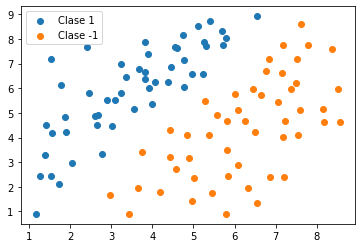

In [ ]:
plt.scatter(class_plus[:, 1], class_plus[:, 2], label="Clase 1")
plt.scatter(class_minus[:, 1], class_minus[:, 2], label='Clase -1')
plt.legend()

# SVM con Multiplicadores de Lagrange

Creación de la clase con la que instanciaremos objetos de tipo SVM.

Esto se hace para poder trabajar mas facilmente con el modelo. Mas adelante desmenuzaremos los métodos que tienen los objetos de clase "SVM".

In [ ]:
class SVM:
    def __init__(self, X, y, num_of_epochs, lr, C):
        
        self.X = X
        self.y = y
        self.num_of_epochs = num_of_epochs
        self.lr = lr
        self.C = C
        
        # Add column vector of ones for computational convenience 
        self.X = np.column_stack((np.ones(len(X)), X)) 
        
        # Initialize normal vector
        self.w = np.ones(len(self.X[0]))


    def distances(self, w, with_lagrange=True):
      distances = self.y * (np.dot(self.X, w)) - 1

      # get distance from the current decision boundary
      # by considering 1 width of margin

      if with_lagrange:  # if lagrange multiplier considered
          # if distance is more than 0
          # sample is not on the support vector
          # Lagrange multiplier will be 0
          distances[distances > 0] = 0

      return distances


    def get_cost_grads(self, X, w, y):
      distances = self.distances(w)

      # Get current cost
      L = 1 / 2 * np.dot(w, w) - self.C * np.sum(distances)

      dw = np.zeros(len(w))

      for ind, d in enumerate(distances):
          if d == 0:  # if sample is not on the support vector
              di = w  # (alpha * y[ind] * X[ind]) = 0
          else:
              # (alpha * y[ind] * X[ind]) = y[ind] * X[ind]
              di = w - (self.C * y[ind] * X[ind])
          dw += di
      return L, dw / len(X)



    def fit(self):
      for i in range(self.num_of_epochs):
        L, dw = self.get_cost_grads(self.X, self.w, self.y)
        self.w = self.w - self.lr * dw
        if i % 100 == 0: # cada 1000
            print(i, ' | ', L)


    def predict(self, X):
      X = np.column_stack((np.ones(len(X)), X))
      return np.sign(X @ self.w)

## Método "__init__"

Es el método constructor, donde definimos atributos básicos que tendrá nuestro modelo:

    def __init__(self, X, y, num_of_epochs, lr, C):
        
        self.X = X
        self.y = y
        self.num_of_epochs = num_of_epochs
        self.lr = lr
        self.C = C
        
        # Add column vector of ones for computational convenience 
        self.X = np.column_stack((np.ones(len(X)), X)) 
        
        # Initialize normal vector
        self.w = np.ones(len(self.X[0]))

Recibe:
- "X" que serán las características o variables predictoras
- "y" la variable objetivo o a predecir
- "num_of_epochs" la cantidad de épocas que tendrá el entrenamiento
- "lr" el learning rate (que tan rápido aprenderá el modelo)
- "C" es la constante que controla que tanta influencia tiene los vectores de soporte en el entrenamiento, "C" mas grande equivale a hacer un margen menor, "C" pequeña a un margen mayor.

## Método "distances"


    def distances(self, w, with_lagrange=True):
      distances = self.y * (np.dot(self.X, w)) - 1

      # get distance from the current decision boundary
      # by considering 1 width of margin

      if with_lagrange:  # if lagrange multiplier considered
          # if distance is more than 0
          # sample is not on the support vector
          # Lagrange multiplier will be 0
          distances[distances > 0] = 0

      return distances

Este toma las distancias a la frontera de desición que tienen un margen de 1 de ancho. Si la distancia es positiva, estas no afectan el problema con restricción por lo que vuelve la "distancia" cero.

## Método "get_cost_grads"



    def get_cost_grads(self, X, w, y):
      distances = self.distances(w)

      # Get current cost
      L = 1 / 2 * np.dot(w, w) - self.C * np.sum(distances)

      dw = np.zeros(len(w))

      for ind, d in enumerate(distances):
          if d == 0:  # if sample is not on the support vector
              di = w  # (alpha * y[ind] * X[ind]) = 0
          else:
              # (alpha * y[ind] * X[ind]) = y[ind] * X[ind]
              di = w - (self.C * y[ind] * X[ind])
          dw += di
      return L, dw / len(X)

Es para calcula el costo dado un vector normal "w" y para encontrar el gradiente de la función objetivo con respecto a "w".

## Métodos "fit" y "predict"

    def fit(self):
      for i in range(self.num_of_epochs):
        L, dw = self.get_cost_grads(self.X, self.w, self.y)
        self.w = self.w - self.lr * dw
        if i % 1000 == 0:
            print(i, ' | ', L)


    def predict(self, X):
      X = np.column_stack((np.ones(len(X)), X))
      return np.sign(X @ self.w)

El método "fit" se encarga de actualizar el vector "w" en cada iteración. 

El método "predict" nos entrega la clase predicha para algún vector de características. Lo hace tomando en cuenta la frontera de decisión.

# Entrenamiento

In [ ]:
data

array([[ 1.    ,  2.6487,  4.5192],
       [ 1.    ,  1.5438,  2.4443],
       [ 1.    ,  1.899 ,  4.2409],
       [ 1.    ,  2.4711,  5.8097],
       [ 1.    ,  3.359 ,  6.4423],
       [ 1.    ,  3.2406,  5.8097],
       [ 1.    ,  3.8128,  6.3917],
       [ 1.    ,  4.4441,  6.8725],
       [ 1.    ,  3.6747,  6.7966],
       [ 1.    ,  4.7401,  8.163 ],
       [ 1.    ,  3.8917,  7.4038],
       [ 1.    ,  4.602 ,  7.6316],
       [ 1.    ,  5.7265,  7.7581],
       [ 1.    ,  4.9571,  6.5688],
       [ 1.    ,  3.9903,  5.3543],
       [ 1.    ,  3.0236,  4.4686],
       [ 1.    ,  2.0568,  2.9757],
       [ 1.    ,  1.2676,  2.4443],
       [ 1.    ,  1.169 ,  0.9008],
       [ 1.    ,  1.7411,  2.1154],
       [ 1.    ,  1.386 ,  3.2794],
       [ 1.    ,  1.5636,  4.165 ],
       [ 1.    ,  1.8793,  4.8482],
       [ 1.    ,  2.7868,  3.33  ],
       [ 1.    ,  3.5563,  5.1518],
       [ 1.    ,  4.0693,  6.2652],
       [ 1.    ,  4.3849,  6.2652],
       [ 1.    ,  1.5438,  7

In [ ]:
np.random.shuffle(data)

train_y = data[:, 0]
train_x = data[:, 1:]

clf = SVM(train_x, train_y, num_of_epochs=10000, lr=1e-3, C=20) # 10000 epocas, C=30
clf.fit()

predict = np.sign(clf.predict(train_x))
p = predict - train_y.flatten()

# Prediction accuracy should be 1.0 for the training set
print("Accuracy |", len(np.where(p == 0)[0]) / len(p))

0  |  12555.524
100  |  217.6708999984334
200  |  157.5520486970894
300  |  137.41080815146444
400  |  134.33104537470302
500  |  132.52907628612155
600  |  131.38682734003143
700  |  130.21820203829114
800  |  130.08674995267054
900  |  130.2455930372267
1000  |  130.09430682834505
1100  |  129.98439800142046
1200  |  129.91925103281585
1300  |  129.8566884944925
1400  |  129.76402658297545
1500  |  129.71509302974445
1600  |  129.63711046827441
1700  |  129.59795457577926
1800  |  129.5516346813335
1900  |  129.45225778639877
2000  |  129.472078328828
2100  |  129.38063521962295
2200  |  129.40731534951524
2300  |  129.32290783294607
2400  |  129.2423989189715
2500  |  129.27758217028978
2600  |  129.20053622550355
2700  |  129.24055081175186
2800  |  129.17949113847484
2900  |  129.15644096644144
3000  |  129.15236196217438
3100  |  129.13128235266794
3200  |  129.12904667704802
3300  |  129.1110423472948
3400  |  129.1290490738312
3500  |  129.0959942590794
3600  |  129.09736209062

In [ ]:
# Creación de datos para verificación
prueba = np.random.normal(5,1,size=(60,2))

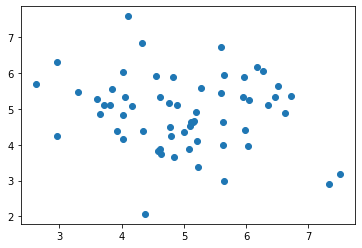

In [ ]:
plt.scatter(prueba[:,0], prueba[:,1])

In [ ]:
prueba_pred = clf.predict(prueba).reshape(-1,1)

In [ ]:
puntos = np.concatenate((prueba_pred, prueba), axis=1)

In [ ]:
puntos

array([[ 1.        ,  4.54545789,  5.90824181],
       [-1.        ,  6.51814162,  5.64960753],
       [-1.        ,  6.17231285,  6.18060673],
       [-1.        ,  6.02352378,  3.95338364],
       [ 1.        ,  4.82507631,  5.89884347],
       [-1.        ,  5.98605282,  4.41914984],
       [-1.        ,  5.95816167,  5.88295192],
       [ 1.        ,  3.83887916,  5.55683822],
       [ 1.        ,  3.65682154,  4.84878393],
       [-1.        ,  4.99707969,  4.36245916],
       [-1.        ,  5.15025317,  4.62389367],
       [-1.        ,  4.37238687,  2.07135076],
       [-1.        ,  4.7526389 ,  5.17520602],
       [ 1.        ,  4.04596501,  5.32614366],
       [-1.        ,  5.64870353,  2.98622982],
       [-1.        ,  6.03913843,  5.23385965],
       [-1.        ,  5.59474944,  5.45074368],
       [-1.        ,  4.77608718,  4.48383475],
       [-1.        ,  4.78655275,  4.23150123],
       [-1.        ,  5.95579685,  5.32871571],
       [-1.        ,  5.64318331,  5.936

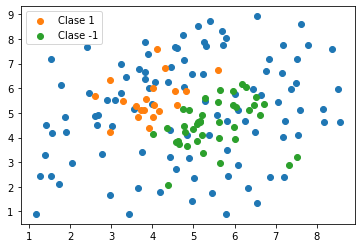

In [ ]:
plt.scatter(data[:,1], data[:, 2])
plt.scatter(puntos[np.where(puntos[:,0] > 0)][:, 1], puntos[np.where(puntos[:,0] > 0)][:, 2], label="Clase 1")
plt.scatter(puntos[np.where(puntos[:,0] < 0)][:, 1], puntos[np.where(puntos[:,0] < 0)][:, 2], label='Clase -1')
plt.legend()

# Ligas de interes

- https://medium.com/@tarlanahad/linear-svm-classifier-step-by-step-theoretical-explanation-with-python-implementation-d86c4973dc33

- https://machinelearningmastery.com/method-of-lagrange-multipliers-the-theory-behind-support-vector-machines-part-3-implementing-an-svm-from-scratch-in-python/